In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as da
import matplotlib as mtplt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime
import scipy.optimize as optimization
import json
    

In [8]:
stocks=['INFY.NS','RELIANCE.NS','ITC.NS','BAJFINANCE.NS','SBIN.NS','TATASTEEL.NS','TATAMOTORS.NS','IOC.NS','CIPLA.NS','ULTRACEMCO.NS']
#stocks from different sector
start_date='2022-07-12'
end_date='2023-09-10'


def Download_Data(stocks):
    data = pd.DataFrame()
    for stock in stocks:
        data[stock] = yf.download(stock , start=start_date,end=end_date)['Adj Close']
    return data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


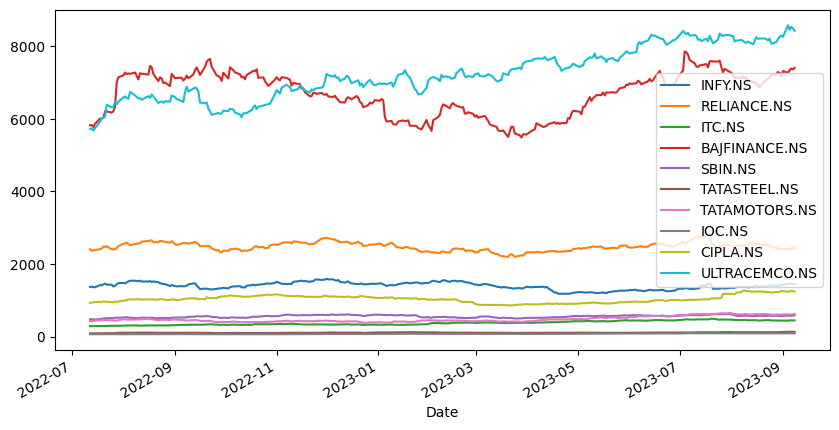

Mean Returns:
INFY.NS          0.051541
RELIANCE.NS      0.015690
ITC.NS           0.380993
BAJFINANCE.NS    0.210897
SBIN.NS          0.178639
TATASTEEL.NS     0.344450
TATAMOTORS.NS    0.331969
IOC.NS           0.306354
CIPLA.NS         0.260877
ULTRACEMCO.NS    0.339449
dtype: float64
Covariance_Matrix:
                INFY.NS  RELIANCE.NS    ITC.NS  BAJFINANCE.NS   SBIN.NS  \
INFY.NS        0.063032     0.015953  0.005621       0.018093  0.008363   
RELIANCE.NS    0.015953     0.043282  0.010156       0.017632  0.013587   
ITC.NS         0.005621     0.010156  0.032308       0.008777  0.010655   
BAJFINANCE.NS  0.018093     0.017632  0.008777       0.068505  0.021960   
SBIN.NS        0.008363     0.013587  0.010655       0.021960  0.048651   
TATASTEEL.NS   0.019146     0.018752  0.009774       0.016804  0.018039   
TATAMOTORS.NS  0.016122     0.017010  0.011388       0.016198  0.015184   
IOC.NS         0.007700     0.009767  0.005452       0.008068  0.013088   
CIPLA.NS       0.

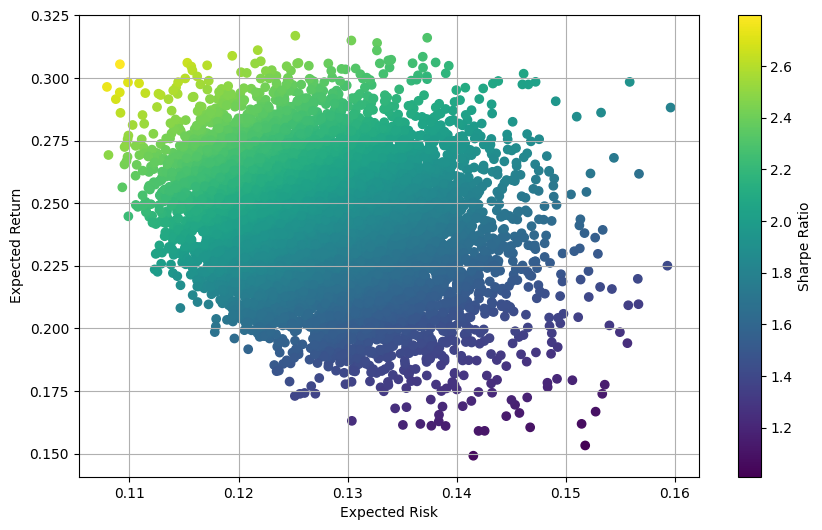

[0.00158275 0.02505127 0.19889391 0.0138879  0.057849   0.01098192
 0.09497169 0.19558537 0.19647604 0.20472015]


In [9]:
Num_Port=10000
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

def Returns(data):
    #daily log returns
    log_returns=np.log(data/data.shift(1))
    log_returns=log_returns[1:]
    return log_returns

def Statistics(returns):
    #*252 for annual metrics/mean of annual return
    mean_return=returns.mean()*252
    covariance=returns.cov()*252
    print('Mean Returns:')
    print(mean_return)
    print('Covariance_Matrix:')
    print(covariance)
    return mean_return,covariance

def Mean_Variance(mean_return,Covariance,weights):
    #portfolio mean variance
    portfolio_return=np.sum(mean_return*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    print('Expected Portfolio Return=',portfolio_return)
    print('Expected Portfolio Volatility=',portfolio_volatility)
    return 


def Show_Portfolios(returns,risks):
    plt.figure(figsize=(10,6))
    plt.scatter(risks,returns,c=returns/risks,marker='o')
    plt.grid(True)
    plt.xlabel("Expected Risk")
    plt.ylabel("Expected Return")
    plt.colorbar(label="Sharpe Ratio")
    plt.show()
    
    
def Genrate_Portfolios(returns):
    portfolio_mean=[]
    portfolio_risk=[]
    portfolio_weights=[]
    
    for i in range(Num_Port):
        #genrating random weights Num_port times and then normalizing by dividing the whole w_array by sum(w) so that the sum of weights is 1.
        w=np.random.random(len(stocks))
        w=w/np.sum(w)
        portfolio_weights.append(w)
        portfolio_mean.append(np.sum(returns.mean()*w)*252)
        portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w))))
    return np.array(portfolio_weights),np.array(portfolio_mean),np.array(portfolio_risk)
    

def Stats(Weights,Returns):
    portfolio_return=np.sum(mean_return*weights)*252
    portfolio_volatility=np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w)))

data=Download_Data(stocks)
show_data(data)
log_daily_returns=Returns(data)
Mean_return,Covariance=Statistics(log_daily_returns)
Weights,p_means,p_risks=Genrate_Portfolios(log_daily_returns)

Show_Portfolios(p_means,p_risks)
Sharpe_Ratio=[]
for i in range(len(p_means)):
    #taking risk free rate as 0 for calculating Sharpe
    Sharpe_Ratio.append(p_means[i]/p_risks[i])
max_SR=max(Sharpe_Ratio)
index=Sharpe_Ratio.index(max_SR)
#OPW=Optimum Portfolio Weights
OPW=Weights[index]
print(OPW)

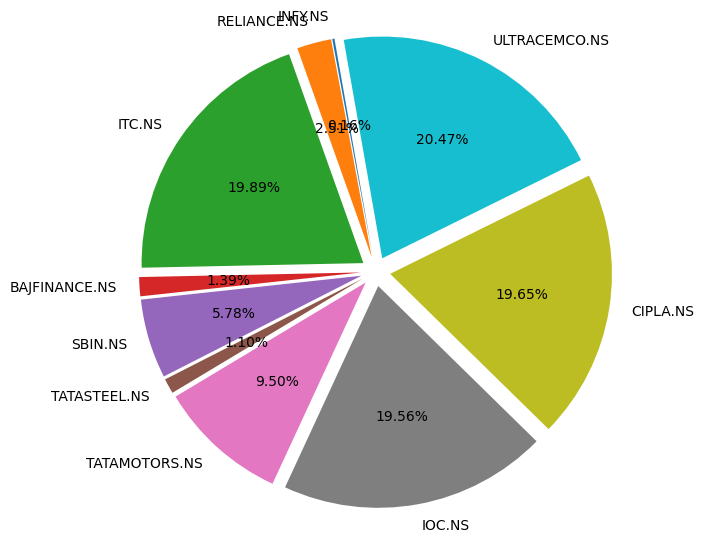

In [10]:
OPW=OPW*100
k=[0.1 for i in range(len(OPW))]
plt.axis("equal")
plt.pie(OPW,labels=stocks,radius=1.5,autopct='%0.2f%%',explode=k,startangle=100)
plt.show()